In [19]:
import  pandas as pd
import numpy as np
import pandas_ta

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [20]:
# load data
df = pd.read_csv("prices.csv")

In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/27/2020,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,01/28/2020,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,01/29/2020,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,01/30/2020,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,01/31/2020,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [22]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


In [23]:
# convert to object to datetime
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       262 non-null    datetime64[ns]
 1   Open       262 non-null    float64       
 2   High       262 non-null    float64       
 3   Low        262 non-null    float64       
 4   Close      262 non-null    float64       
 5   Adj Close  262 non-null    float64       
 6   Volume     262 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.5 KB


In [24]:
# Add EMA to dataframe by appending
df.ta.ema(close='Adj Close', length=10, append=True)
df = df[9:]

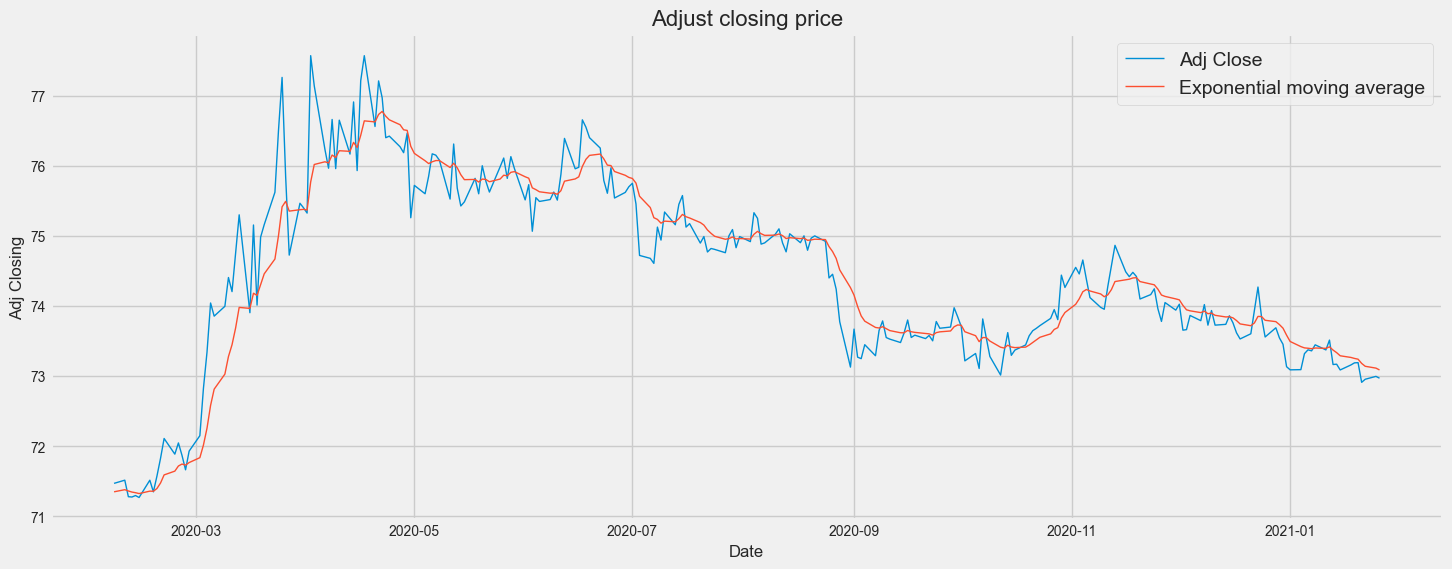

In [25]:
plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['Adj Close'], linewidth = 1, label = 'Adj Close')
plt.plot(df['Date'], df['EMA_10'], linewidth = 1, label = 'Exponential moving average')
# Set labels and title
plt.legend()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Closing', fontsize=12)
plt.title('Adjust closing price', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the chart
plt.show()

### What was the daily return of the stock on average?


In [26]:
df['Daily Return'] = df['Adj Close'].pct_change()
print(df['Daily Return'].describe())

count    252.000000
mean       0.000097
std        0.005436
min       -0.018539
25%       -0.002673
50%        0.000055
75%        0.002840
max        0.029804
Name: Daily Return, dtype: float64


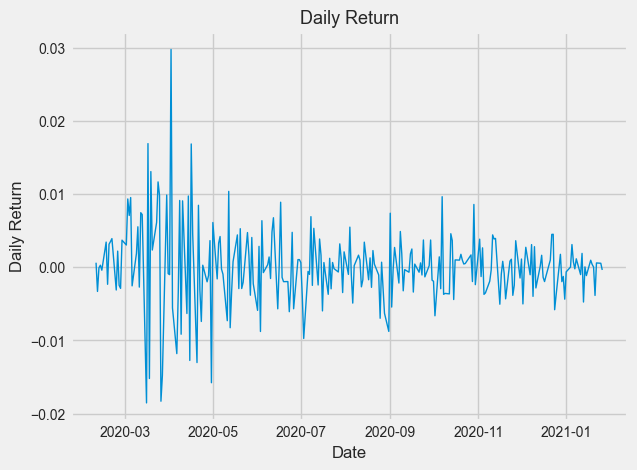

In [27]:
plt.plot(df['Date'],df['Daily Return'], linestyle='-',  linewidth=1)
# Set labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.title('Daily Return', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


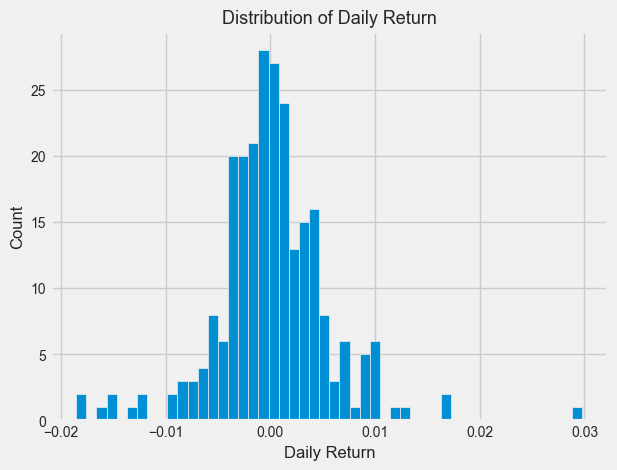

In [28]:
df['Daily Return'].hist(bins=50)
# Set labels and title
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Daily Return', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [29]:
# remove row have na values
df =df[1:]

# Prepare the feature matrix X and target variable y
X = df.drop(['Close', 'Adj Close', 'EMA_10', 'Volume', 'Date'], axis = 1) # Select relevant features
y = df['EMA_10']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.019159081416843117


In [30]:

# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [31]:
# Evaluate model 

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE
rmse = sqrt(mse)

# Printout relevant metrics
print("Mean Absolute Error(MAE):", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination (r2 score):", r2_score(y_test, y_pred))
print("Mean Square Error (MSE):", mse)
print("Root Mean Square Error (RMSE):", rmse)

Mean Absolute Error(MAE): 0.10745240556396614
Coefficient of Determination (r2 score): 0.8616045941346068
Mean Square Error (MSE): 0.019159081416843117
Root Mean Square Error (RMSE): 0.13841633363459357


In [32]:
valid = df[len(X_train):]
valid['Pred'] = y_pred
valid.head()

/var/folders/71/ygrm6v2d3zq5y8nmqn34lsbw0000gn/T/ipykernel_26680/134317778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred'] = y_pred


,Date,Open,High,Low,Close,Adj Close,Volume,EMA_10,Daily Return,Pred
211,2020-11-17,74.550003,74.608902,74.326797,74.418098,74.418098,0,74.381905,-0.000934,74.674920
212,2020-11-18,74.480103,74.704803,74.035202,74.479698,74.479698,0,74.399686,0.000828,74.354557
213,2020-11-19,74.419998,74.442299,74.119797,74.419998,74.419998,0,74.403379,-0.000802,74.484811
214,2020-11-20,74.099602,74.339203,74.072998,74.099602,74.099602,0,74.348147,-0.004305,74.411533
215,2020-11-23,74.119797,74.406303,74.002998,74.162399,74.162399,0,74.314374,0.000847,74.219997


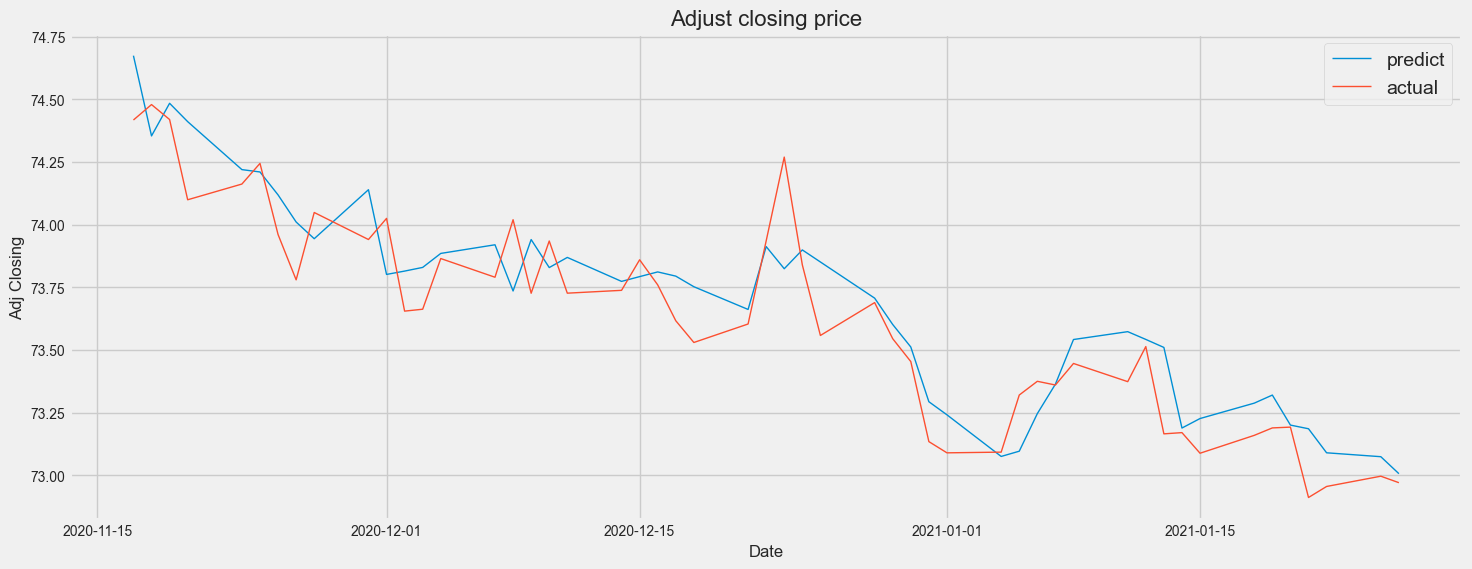

In [33]:


plt.figure(figsize=(16,6))
plt.plot(valid['Date'], valid['Pred'], linewidth = 1, label = 'predict')
plt.plot(valid['Date'], valid['Close'], linewidth = 1, label = 'actual')
# Set labels and title
plt.legend()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Closing', fontsize=12)
plt.title('Adjust closing price', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show;

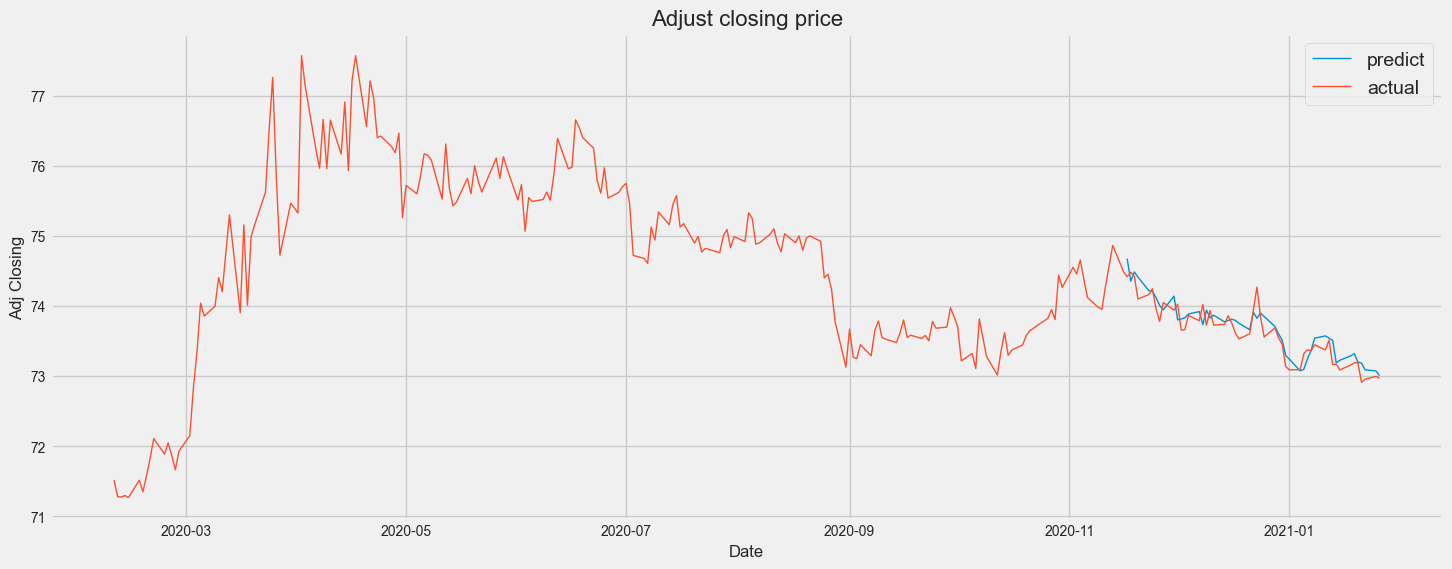

In [34]:
plt.figure(figsize=(16,6))
plt.plot(valid['Date'], valid['Pred'], linewidth = 1, label = 'predict')
plt.plot(df['Date'], df['Close'], linewidth = 1, label = 'actual')
# Set labels and title
plt.legend()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Closing', fontsize=12)
plt.title('Adjust closing price', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show;

In [35]:
final_result = valid[['Date','Close', 'Pred']].reset_index(drop = True)

final_result.to_csv('result_predict_stock_price.csv', index = True)

In [36]:
final_result.head()

,Date,Close,Pred
0,2020-11-17,74.418098,74.674920
1,2020-11-18,74.479698,74.354557
2,2020-11-19,74.419998,74.484811
3,2020-11-20,74.099602,74.411533
4,2020-11-23,74.162399,74.219997
